In [1]:
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
np.random.seed(42)

In [2]:
filePath = '/cxldata/datasets/project/bikes.csv'
bikesData = pd.read_csv(filePath)

In [3]:
type(bikesData)

pandas.core.frame.DataFrame

In [4]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bikesData["yr"].unique()

array([0, 1])

In [6]:
bikesData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
np.mean(bikesData["hum"])

0.6272288394038822

In [9]:
columnsToDrop = ["instant","casual","registered","atemp","dteday"]

In [10]:
bikesData = bikesData.drop(columnsToDrop,axis=1)

In [11]:
bikesData

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

print(len(train_set), "train +", len(test_set), "test")

test_set.head()

12165 train + 5214 test


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
12830,3,1,6,19,0,6,0,1,0.80,0.27,0.1940,425
8688,1,1,1,20,1,1,0,1,0.24,0.41,0.2239,88
7091,4,0,10,2,0,5,1,1,0.32,0.66,0.2836,4
12230,2,1,5,19,0,2,1,1,0.78,0.52,0.3582,526
431,1,0,1,0,0,4,1,1,0.26,0.56,0.3881,13


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff997fb4e0>,
      dtype=object)

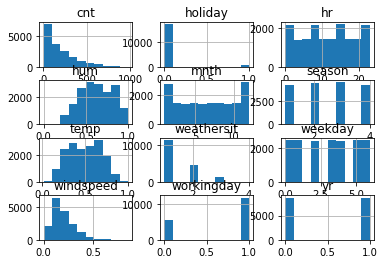

In [13]:
bikesData.hist()

In [14]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

print(len(train_set), "train +", len(test_set), "test")

test_set.head()

12165 train + 5214 test


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
12830,3,1,6,19,0,6,0,1,0.80,0.27,0.1940,425,534.583333
8688,1,1,1,20,1,1,0,1,0.24,0.41,0.2239,88,362.000000
7091,4,0,10,2,0,5,1,1,0.32,0.66,0.2836,4,295.458333
12230,2,1,5,19,0,2,1,1,0.78,0.52,0.3582,526,509.583333
431,1,0,1,0,0,4,1,1,0.26,0.56,0.3881,13,17.958333


In [16]:
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
train_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,0.083333
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,0.166667
6,1,0,1,6,0,6,0,1,0.22,0.80,0.0000,2,0.250000
7,1,0,1,7,0,6,0,1,0.20,0.86,0.0000,3,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,1,12,17,0,1,1,2,0.26,0.48,0.0896,164,723.833333
17373,1,1,12,18,0,1,1,2,0.26,0.48,0.1343,122,723.875000
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,723.916667
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,724.000000


In [18]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0.000000
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0.125000
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,1,0.208333
8,1,0,1,8,0,6,0,1,0.24,0.75,0.0000,8,0.333333
14,1,0,1,14,0,6,0,2,0.46,0.72,0.2836,106,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,0.20,0.51,0.2239,49,723.083333
17355,1,1,12,0,0,1,1,1,0.18,0.55,0.1940,34,723.125000
17367,1,1,12,12,0,1,1,2,0.24,0.56,0.1940,224,723.625000
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,723.958333


In [19]:
columnsToScale = ['temp','hum','windspeed']

In [20]:
scaler = StandardScaler()

In [21]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
train_set[columnsToScale].describe()

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,temp,hum,windspeed
count,1.216500e+04,1.216500e+04,1.216500e+04
mean,1.658955e-15,4.775031e-17,-1.367550e-15
std,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.476000e+00,-3.245965e+00,-1.552670e+00
25%,-8.186290e-01,-7.628859e-01,-6.962541e-01
50%,1.005628e-02,1.307622e-02,-2.069907e-01
75%,8.387416e-01,8.407692e-01,5.264946e-01
max,2.599698e+00,1.927116e+00,5.419128e+00


In [22]:
corr_matrix = bikesData.corr()
corr_matrix["cnt"].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
hr            0.394071
dayCount      0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

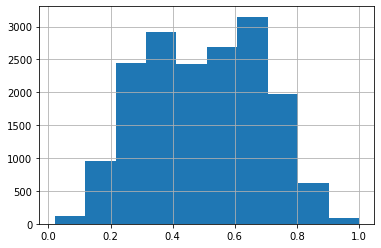

In [23]:
bikesData["temp"].hist()

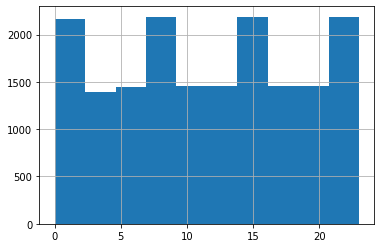

In [24]:
bikesData["hr"].hist()

In [25]:
bikesData["temp"].value_counts()

0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.26    559
0.46    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.14    138
0.84    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.08     17
0.02     17
0.04     16
0.96     16
0.06     16
0.98      1
1.00      1
Name: temp, dtype: int64

In [26]:
bikesData["temp_cat"] = np.ceil(bikesData["temp"]*10)

In [27]:
bikesData["temp_cat"].value_counts()

7.0     3150
4.0     2913
6.0     2684
3.0     2444
5.0     2433
8.0     1976
2.0      953
9.0      625
1.0      117
10.0      84
Name: temp_cat, dtype: int64

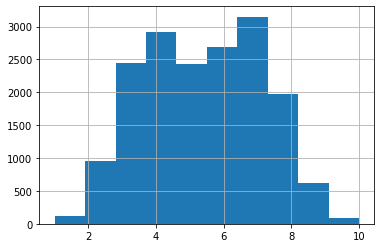

In [28]:
bikesData["temp_cat"].hist()

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(bikesData, bikesData["temp_cat"]):
    strat_train_set = bikesData.loc[train_index]
    strat_test_set = bikesData.loc[test_index]

In [30]:
strat_test_set["temp_cat"].value_counts() / len(strat_test_set)

7.0     0.181243
4.0     0.167626
6.0     0.154392
3.0     0.140583
5.0     0.140008
8.0     0.113732
2.0     0.054852
9.0     0.036057
1.0     0.006713
10.0    0.004795
Name: temp_cat, dtype: float64

In [31]:
bikesData["temp_cat"].value_counts() / len(bikesData)

7.0     0.181253
4.0     0.167616
6.0     0.154439
3.0     0.140629
5.0     0.139997
8.0     0.113700
2.0     0.054836
9.0     0.035963
1.0     0.006732
10.0    0.004833
Name: temp_cat, dtype: float64

In [32]:
def temp_cat_proportions(data):
    return data["temp_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

compare_props = pd.DataFrame({
    "Overall": temp_cat_proportions(bikesData),
    "Stratified": temp_cat_proportions(strat_test_set),
    "Random": temp_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [33]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.006732,0.006713,0.006137,-8.837154,-0.290638
2.0,0.054836,0.054852,0.052551,-4.167809,0.029222
3.0,0.140629,0.140583,0.143843,2.285440,-0.033030
4.0,0.167616,0.167626,0.171461,2.294148,0.005689
5.0,0.139997,0.140008,0.143268,2.336898,0.007946
6.0,0.154439,0.154392,0.158228,2.453121,-0.030591
7.0,0.181253,0.181243,0.174914,-3.497616,-0.005754
8.0,0.113700,0.113732,0.107979,-5.032455,0.027983
9.0,0.035963,0.036057,0.037399,3.994016,0.260898
10.0,0.004833,0.004795,0.004219,-12.703436,-0.799359


In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("temp_cat", axis=1, inplace=True)

In [35]:
strat_train_set.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
8269,4,0,12,5,0,5,1,1,0.48,0.44,0.3881,26,344.541667
3208,2,0,5,14,0,3,1,2,0.58,0.78,0.2836,138,133.666667
1697,1,0,3,9,0,3,1,2,0.32,0.93,0.1343,154,70.708333
5966,3,0,9,3,0,0,0,2,0.62,0.78,0.0896,45,248.583333
15505,4,1,10,6,0,6,0,1,0.30,0.61,0.1940,28,646.041667


In [36]:
corr_matrix["cnt"].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
hr            0.394071
dayCount      0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff90aa1128>,
      dtype=object)

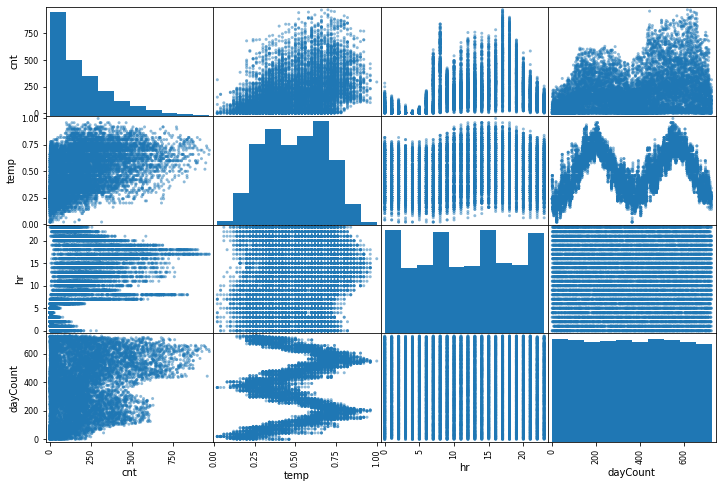

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["cnt", "temp", "hr",
              "dayCount"]
scatter_matrix(strat_train_set[attributes], figsize=(12, 8))

In [38]:
bikesData["cnt"].sort_values()

10896      1
8052       1
10201      1
210        1
212        1
        ... 
15084    967
14725    968
14748    970
14964    976
14773    977
Name: cnt, Length: 17379, dtype: int64

[0, 1, 0, 600]

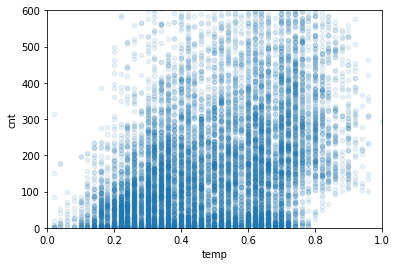

In [39]:
strat_train_set.plot(kind="scatter", x="temp", y="cnt",
             alpha=0.1)
plt.axis([0, 1, 0, 600])

In [40]:
scaler = StandardScaler()

In [41]:
train_set = strat_train_set.drop("cnt", axis=1) # drop labels for training set
train_set_label = strat_train_set["cnt"].copy()
test_set = strat_test_set.drop("cnt", axis=1) # drop labels for training set
test_set_label = strat_test_set["cnt"].copy()

In [42]:
train_set.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,dayCount
8269,4,0,12,5,0,5,1,1,0.48,0.44,0.3881,344.541667
3208,2,0,5,14,0,3,1,2,0.58,0.78,0.2836,133.666667
1697,1,0,3,9,0,3,1,2,0.32,0.93,0.1343,70.708333
5966,3,0,9,3,0,0,0,2,0.62,0.78,0.0896,248.583333
15505,4,1,10,6,0,6,0,1,0.30,0.61,0.1940,646.041667


In [43]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
test_set[columnsToScale] = scaler.fit_transform(test_set[columnsToScale])
train_set[columnsToScale].describe()

,temp,hum,windspeed
count,1.216500e+04,1.216500e+04,1.216500e+04
mean,2.969539e-16,-1.299732e-16,3.322729e-16
std,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.478716e+00,-3.230707e+00,-1.553151e+00
25%,-8.160163e-01,-8.081566e-01,-6.981510e-01
50%,1.533367e-02,1.654141e-02,-2.096965e-01
75%,8.466837e-01,7.896958e-01,5.225761e-01
max,2.613302e+00,1.923655e+00,5.407121e+00


In [44]:
np.median(train_set["temp"])

0.015333674541081303

In [45]:
np.mean(train_set["temp"])

2.9695385758531316e-16

In [46]:
np.mean(train_set["hum"])

-1.2997321171557063e-16

In [47]:
np.mean(train_set["windspeed"])

3.322729131159285e-16

In [48]:
np.std(train_set["temp"])

1.0000000000000009

In [49]:
np.std(train_set["hum"])

1.0000000000000107

In [50]:
np.std(train_set["windspeed"])

1.0000000000000049

In [51]:
def display_scores(scores):
    print("scores", scores)
    print("Mean", scores.mean())
    print("Standard deviation", scores.std())

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

from xgboost import XGBRegressor

In [53]:
trainingCols = train_set
trainingLabels = train_set_label

In [54]:
dec_reg = DecisionTreeRegressor(random_state=42)


In [55]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(dt_mae_scores)

scores [34.87510271 34.32210353 35.91618735 36.32867707 33.81594084 35.91365132
 35.08059211 33.53782895 32.51973684 34.97450658]
Mean 34.72843272931713
Standard deviation 1.1347240411762718


In [56]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

scores [57.34080531 57.14600942 60.55516917 60.93611024 59.77094047 61.17953116
 61.22541128 56.11474968 55.39465168 57.25935772]
Mean 58.69227361271835
Standard deviation 2.1461716839834697


In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(trainingCols, trainingLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels,
                             scoring="neg_mean_absolute_error", cv=10)

display_scores(lr_mae_scores)

scores [108.99981761 107.36518366 107.84474089 106.00428879 104.98659688
 109.30862142 103.79215133 105.11162005 101.99888248 101.41282694]
Mean 105.68247300405551
Standard deviation 2.6066522584799046


In [59]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels,
                             scoring="neg_mean_squared_error", cv=10))

display_scores(lr_mse_scores)

scores [143.39512001 146.35667757 142.66521616 140.60051923 142.17287169
 145.22540439 140.93833125 139.37823179 135.352672   135.47491935]
Mean 141.15599634443
Standard deviation 3.4842820037771713


In [60]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)


In [61]:
rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels,
                                scoring="neg_mean_absolute_error", cv=10)
display_scores(rf_mae_scores)

scores [25.18422898 26.15681731 25.91584224 26.52528622 24.05950698 25.6832511
 24.89       24.13251096 24.54871162 26.05231908]
Mean 25.314847449419048
Standard deviation 0.8350554200652143


In [62]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels,
                                scoring="neg_mean_squared_error", cv=10))
display_scores(rf_mse_scores)

scores [40.25966194 42.73642972 43.90837908 44.56144996 39.74494799 43.44942302
 42.48515397 39.24990679 42.02899312 41.62223846]
Mean 42.00465840431991
Standard deviation 1.7000542057262735


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = [
    
    {'n_estimators': [120, 150], 'max_features': [10,12],'max_depth': [15, 28]},
]

In [65]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')


In [66]:
grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [67]:
grid_search.best_params_

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}

In [68]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [70]:
print(feature_importances)

[0.00496892 0.0042248  0.00513721 0.58875338 0.00188354 0.01847818
 0.06774074 0.01870273 0.09228047 0.03269009 0.00919743 0.15594251]


In [71]:
final_model = grid_search.best_estimator_

In [72]:
X_test = test_set
y_test = test_set_label

In [73]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5214 entries, 2573 to 14807
Data columns (total 12 columns):
season        5214 non-null int64
yr            5214 non-null int64
mnth          5214 non-null int64
hr            5214 non-null int64
holiday       5214 non-null int64
weekday       5214 non-null int64
workingday    5214 non-null int64
weathersit    5214 non-null int64
temp          5214 non-null float64
hum           5214 non-null float64
windspeed     5214 non-null float64
dayCount      5214 non-null float64
dtypes: float64(4), int64(8)
memory usage: 529.5 KB


In [76]:
trainingCols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12165 entries, 8269 to 17135
Data columns (total 12 columns):
season        12165 non-null int64
yr            12165 non-null int64
mnth          12165 non-null int64
hr            12165 non-null int64
holiday       12165 non-null int64
weekday       12165 non-null int64
workingday    12165 non-null int64
weathersit    12165 non-null int64
temp          12165 non-null float64
hum           12165 non-null float64
windspeed     12165 non-null float64
dayCount      12165 non-null float64
dtypes: float64(4), int64(8)
memory usage: 1.2 MB


In [88]:
final_predictions = final_model.predict(X_test)

final_msee = mean_squared_error(y_test, final_predictions)
final_mse = np.sqrt(final_msee)

In [90]:
print (final_mse)

40.63221525266157
